In [1]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

from numpy_CNN.NN_np import (
    FullyConnectedLayer,
    ReLULayer,
    SigmoidLayer,
    ReLULayer,
    AdamOptimizer,
    CrossEntropyLoss,
    LinearActivation,
    Sequential,
    Optimizer,
    SoftMaxLayer,
)

In [2]:
from keras.datasets import mnist


In [3]:
plt.gray()

<Figure size 432x288 with 0 Axes>

In [4]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

In [5]:
def one_hot(y: np.ndarray, n_classes: int):
    encoded = np.zeros((n_classes, y.size))
    encoded[y, np.arange(y.size)] = 1
    return encoded

In [6]:
X_train = X_train.reshape(-1, 28 * 28).T
X_test = X_test.reshape(-1, 28 * 28).T
y_train = one_hot(y_train, 10)
y_test = one_hot(y_test, 10)

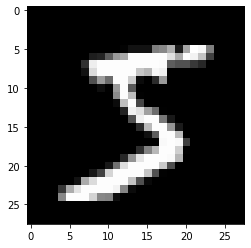

In [7]:
plt.imshow(X_train[:, 0].reshape(28, 28))

In [11]:
def train(model, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray,
          optimizer: Optimizer, loss, epochs: int, batch_size: int):
    
    metric_names = ['loss', 'accuracy', 'f1_score']
    history = {phase_name: {metric_name: [] for metric_name in metric_names} for phase_name in ['train', 'test']}

    for i in range(epochs):
        for j in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[j:j+batch_size]
            y_batch = y_train[j:j+batch_size]
            y_pred = model.forward(X_batch)
            loss_val = loss.forward(y_pred, y_batch)
            loss_gradient = loss.backward()
            model.backward(loss_gradient)
            optimizer.step()

            y_pred_label = np.argmax(y_pred, axis=0)
            y_true_label = np.argmax(y_train, axis=0)

            history['train']['accuracy'].append(np.mean(y_pred_label == y_true_label))
            history['train']['loss'].append(loss_val)
            history['train']['f1_score'].append(f1_score(y_true_label, y_pred_label, average='macro'))
    return history

In [9]:
# train(model, X, y, optimizer, loss, 10, X.shape[-1])

In [17]:
model = Sequential([28*28, 100, 10], [ReLULayer, SoftMaxLayer])
optimizer = AdamOptimizer(model.trainable_layers, learning_rate = 0.001)
loss = CrossEntropyLoss()

batch_size = X_train.shape[-1]
epochs = 7

history = train(model, X_train, y_train, X_test, y_test, optimizer, loss, epochs, batch_size)

c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NN_np.py:128: RuntimeWarning: overflow encountered in exp
  self.output = np.exp(input_) / np.sum(np.exp(input_), axis=0, keepdims=True)
c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NN_np.py:128: RuntimeWarning: invalid value encountered in divide
  self.output = np.exp(input_) / np.sum(np.exp(input_), axis=0, keepdims=True)
c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NN_np.py:146: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.dot(np.log(pred),target.T) + np.dot(np.log(1 - pred), (1 - target).T)) / batch_size
c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NN_np.py:150: RuntimeWarning: divide by zero encountered in divide
  return - (np.divide(self.target, self.pred) - np.divide(1 - self.target, 1 - self.pred))
c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NN_np.py:150: RuntimeWarning: invalid value encountered i

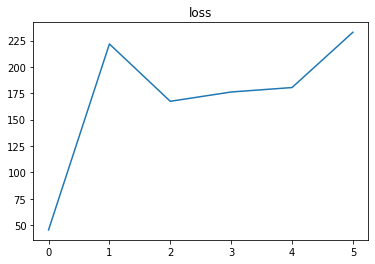

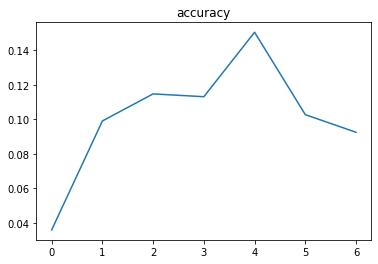

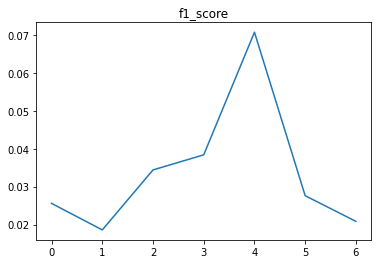

In [18]:
for key, value in history['train'].items():
    plt.plot(value)
    plt.title(key)
    plt.show()

In [ ]:
y_pred.shape

(10, 1797)

In [ ]:
X[:, 0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
a = model.forward(X[:, [0]])

In [ ]:
a.shape

(10, 1)

In [ ]:
"""
def train(model, X: np.ndarray, y: np.ndarray, optimizer: Optimizer, loss, epochs: int, batch_size: int = 32, verbose: bool = True):
    for epoch in range(epochs):
        for X_batch, y_batch in get_batches(X, y, batch_size):
            y_pred = model.forward(X_batch)
            loss_gradient = loss.gradient(y_batch, y_pred)
            model.backward(loss_gradient)
            optimizer.step()
        if verbose:
            print(f"Epoch {epoch + 1}/{epochs} loss: {loss(y_batch, y_pred)}")
"""

'\ndef train(model, X: np.ndarray, y: np.ndarray, optimizer: Optimizer, loss, epochs: int, batch_size: int = 32, verbose: bool = True):\n    for epoch in range(epochs):\n        for X_batch, y_batch in get_batches(X, y, batch_size):\n            y_pred = model.forward(X_batch)\n            loss_gradient = loss.gradient(y_batch, y_pred)\n            model.backward(loss_gradient)\n            optimizer.step()\n        if verbose:\n            print(f"Epoch {epoch + 1}/{epochs} loss: {loss(y_batch, y_pred)}")\n'